# Redes convolucionales

[![](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ganegroup/workshop_nn/blob/main/06_redes_convolucionales.ipynb)

En las redes neuronales feedforward tradicionales (como las que estudiamos en la parte anterior), cada neurona en la capa de entrada está conectada a cada neurona de salida en la siguiente capa; a esto lo llamamos capa "Fully Connected" (FC), o capa Densa. Sin embargo, en las redes neuronales convolucionales (CNN), no usamos capas de FC hasta la(s) última(s) capa(s) de la red. Por lo tanto, podemos definir una CNN como una red neuronal que intercambia una capa "convolucional" en lugar de una capa "totalmente conectada" en al menos una de las capas en la red.

<!-- ![Conectividad de una capa FC versus una capa convolucional](images/locally_connected_CNN.png) -->

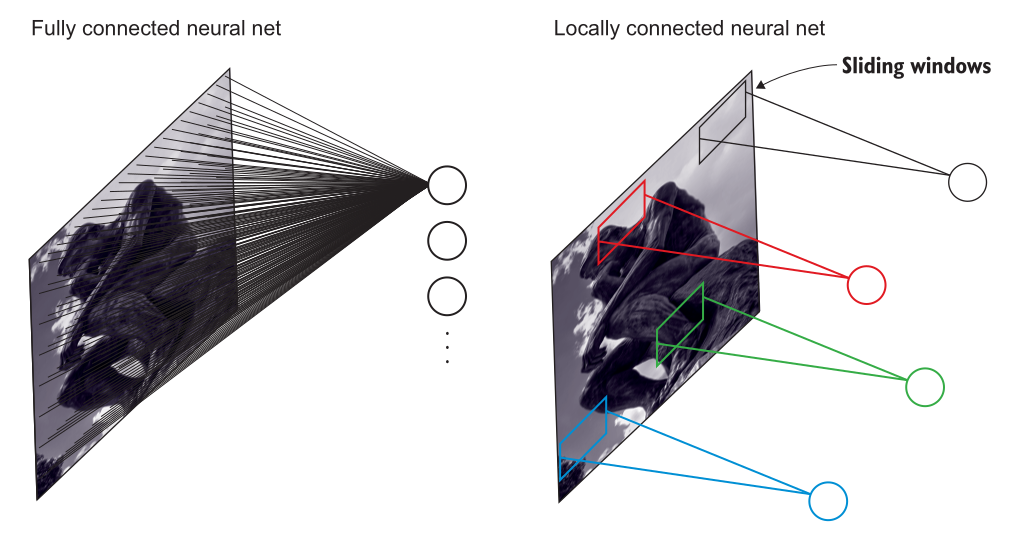

De forma general, luego de esas convoluciones se aplica una función de activación no lineal, como ReLU. Las capas convolucionales se aplican sucesivamente, junto con una mezcla de otros tipos de capas para ayudar a reducir la dimensión de entrada y ayudar a reducir el overfitting. Al llegar al final de la red se suele aplicar una o dos capas FC a partir de las cuales podemos obtener nuestro resultado final.

<!-- ![Esquema de una red neuronal convolucional](images/esquema_cnn.png) -->

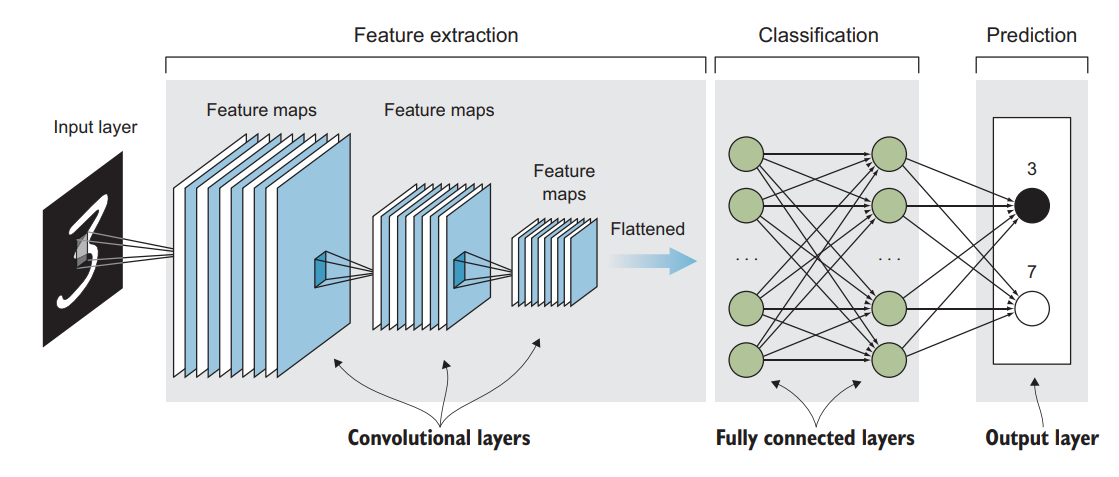

Cada capa en una CNN aplica un conjunto diferente de filtros, generalmente cientos o miles de ellos, y combina los resultados, alimentando la salida a la siguiente capa en la red. **Durante el entrenamiento, una CNN aprende automáticamente los valores de estos filtros.**

La CNN puede aprender a:

- Detectar bordes a partir de datos de píxeles en la primera capa.
- Utilizar estos bordes para detectar formas (es decir, "manchas") en la segunda capa.
- Usar esas formas para detectar características de alto nivel, como estructuras faciales, partes de un automóvil, etc. en las últimas capas de la red.

<!-- ![Esquema de lo que "ve" una red convolucional](images/image_features.png) -->

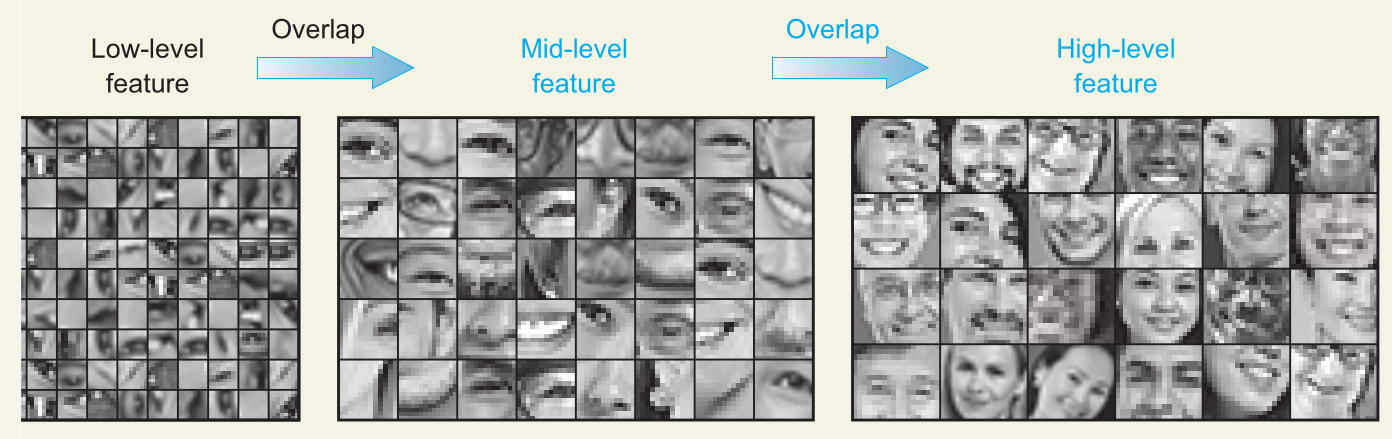

La última capa de una CNN utiliza estas features de nivel superior para hacer predicciones sobre el contenido de la imagen. En la práctica, las CNN tienen dos grandes beneficios:

1. Invariancia local
2. Composicióncionalidad.

El concepto de invariancia local nos permite determinar que una imagen contiene un determinado objeto sin importar en qué parte de la imagen aparece el mismo. Por otro lado, la composicióncionalidad se refiere a que cada filtro logra combinar los features de bajo nivel de una capa, en representaciones de más alto nivel. Dichas representaciones se van volviendo más ricas a medida que llegan a las capas más profundas al punto que las últimas neuronas son capaces de reconocer aspectos muy complejos de las imágenes. De esta manera, nuestra red puede construir bordes a partir de píxeles, formas a partir de bordes y luego objetos complejos a partir de formas, todo de una manera automatizada que sucede naturalmente durante el proceso de entrenamiento. 


<!-- ![Campo receptivo de una CNN](images/receptive_field.webp) -->

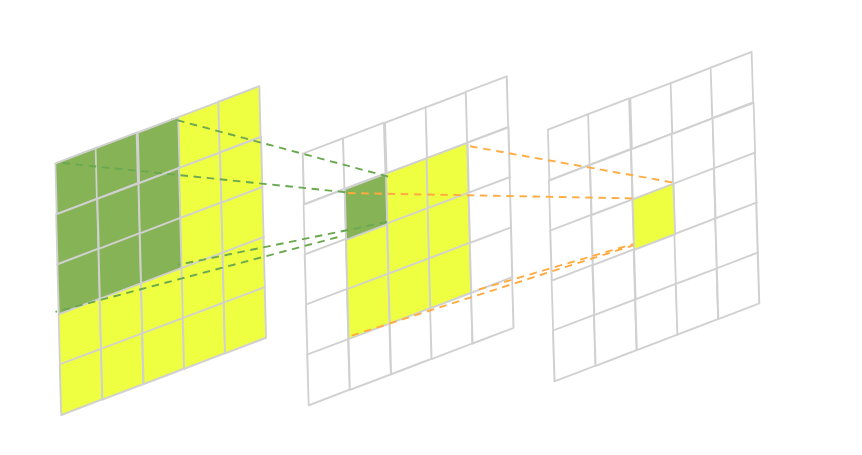

## ¿Qué son las convoluciones?

Suena complicado, pero si alguna vez utilizaron algún programa tipo Photoshop para 'blurear' o volver más nítida una imagen, entonces probablemente ya usaron convoluciones, aunque no lo supieran. 

En términos sencillos, una convolución (de una imagen) es simplemente una multiplicación punto por punto de dos matrices seguidas de una suma. No mucho más

1. Tomamos dos matrices (que tengan las mismas dimensiones).
2. Multiplicamos, elemento por elemento (es decir, no el producto matricial, solo una simple multiplicación).
3. Sumamos todos los elementos resultantes.

<!-- ![Esquema de una convolución](images/conv-full-layer.gif) -->

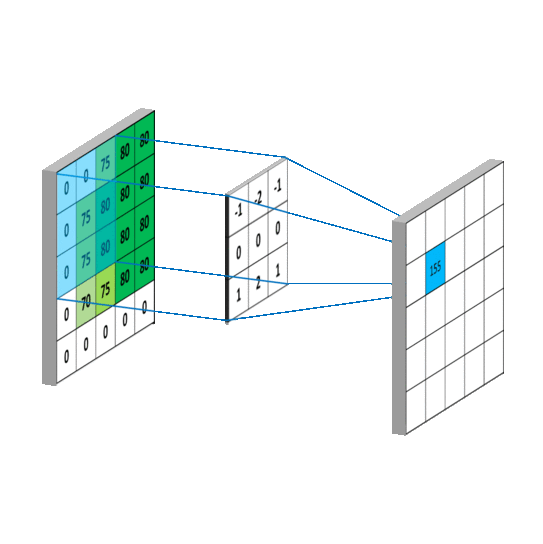

### Algunos ejemplos de filtros

Por ejemplo, si convolucionamos una imagen con una matriz de 3x3 de esta forma:

$$ \begin{bmatrix}
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9
\end{bmatrix} $$

Lo que obtendremos será tener una imagen donde cáda pixel estará formado por el promedio de todos los pixeles cercanos. El efecto será una imagen difuminada

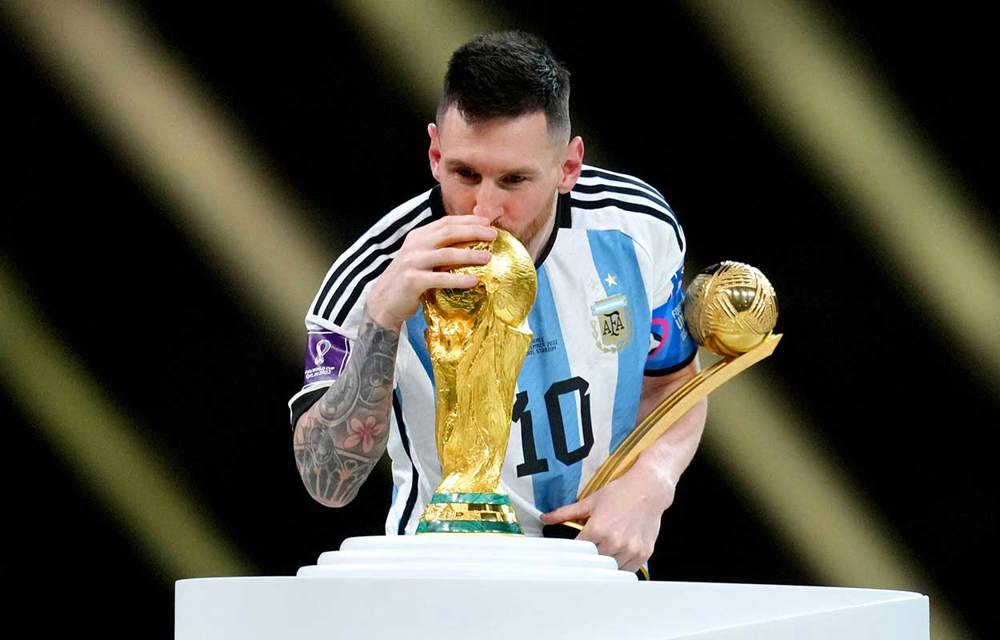

In [1]:
from PIL import Image, ImageFilter
import requests
from io import BytesIO
import seaborn as sns
import numpy as np

url = "https://fifpro.org/media/fhmfhvkx/messi-world-cup.jpg?rxy=0.48356841796117644,0.31512414378031967&width=1000&height=640&rnd=133210253587130000"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

img

<Axes: >

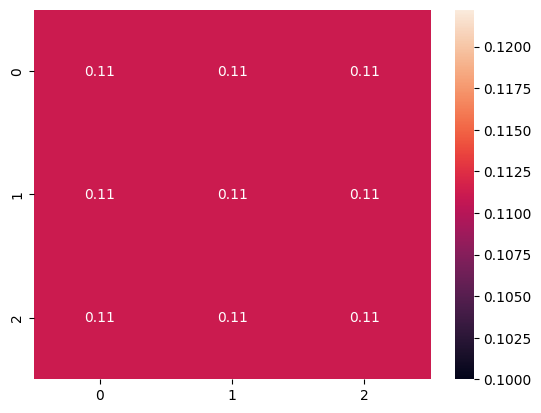

In [2]:
kernel_spec = [
    1/9, 1/9, 1/9,
    1/9,  1/9, 1/9,
    1/9, 1/9, 1/9
]
sns.heatmap(np.array(kernel_spec).reshape(3, 3), annot=True)

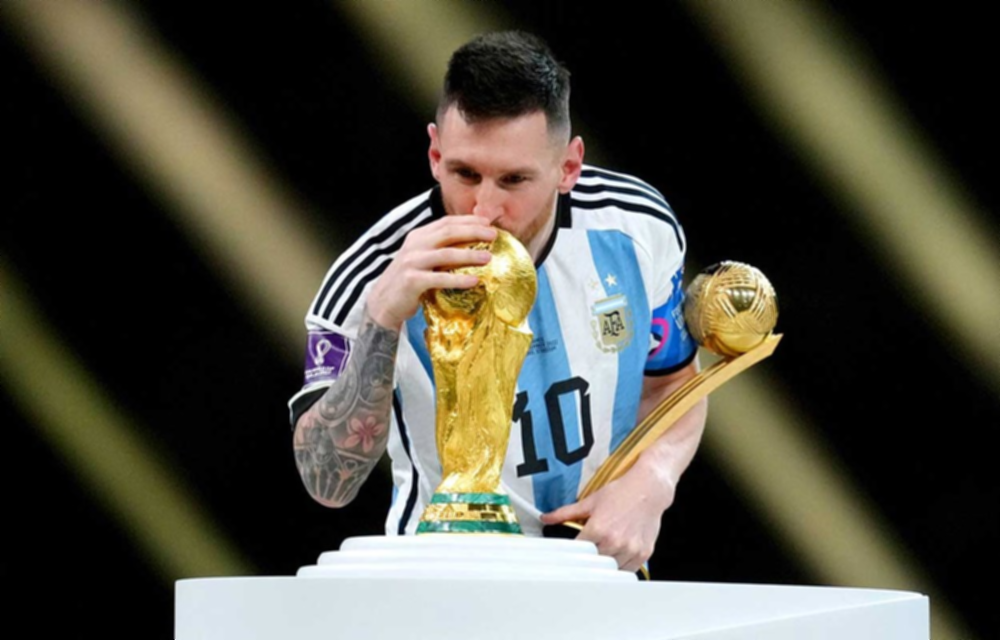

In [3]:
kernel = ImageFilter.Kernel((3, 3), kernel=kernel_spec)

img.filter(kernel)

<Axes: >

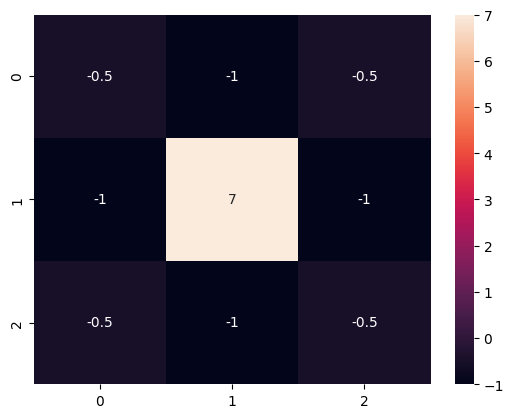

In [4]:
kernel_spec = [
    -0.5, -1.0, -0.5,
    -1.0,  7.0, -1.0,
    -0.5, -1.0, -0.5
]

sns.heatmap(np.array(kernel_spec).reshape(3, 3), annot=True)

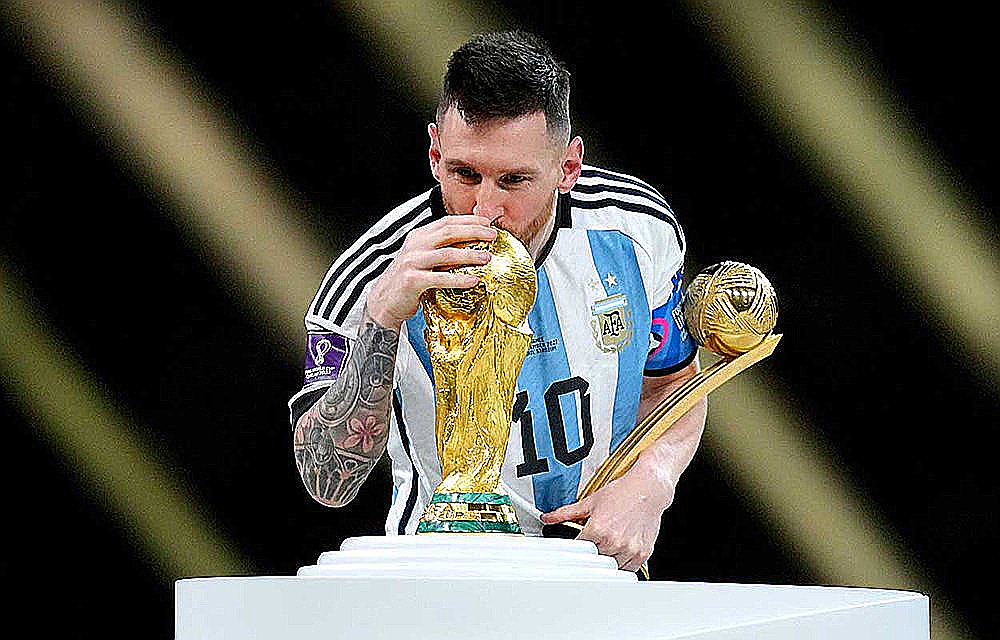

In [5]:
kernel = ImageFilter.Kernel((3, 3), kernel=kernel_spec)
img.filter(kernel)

Probemos ahora con una familia de filtros conocidos como Sobel

<Axes: >

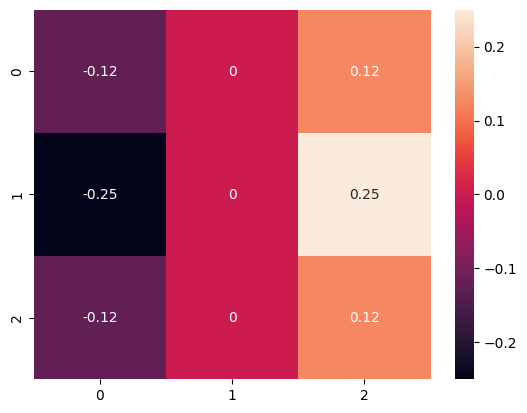

In [6]:
kernel_spec = [
    -0.125, 0.0, 0.125,
    -0.25,  0.0, 0.25,
    -0.125, 0.0, 0.125
]

sns.heatmap(np.array(kernel_spec).reshape(3, 3), annot=True)

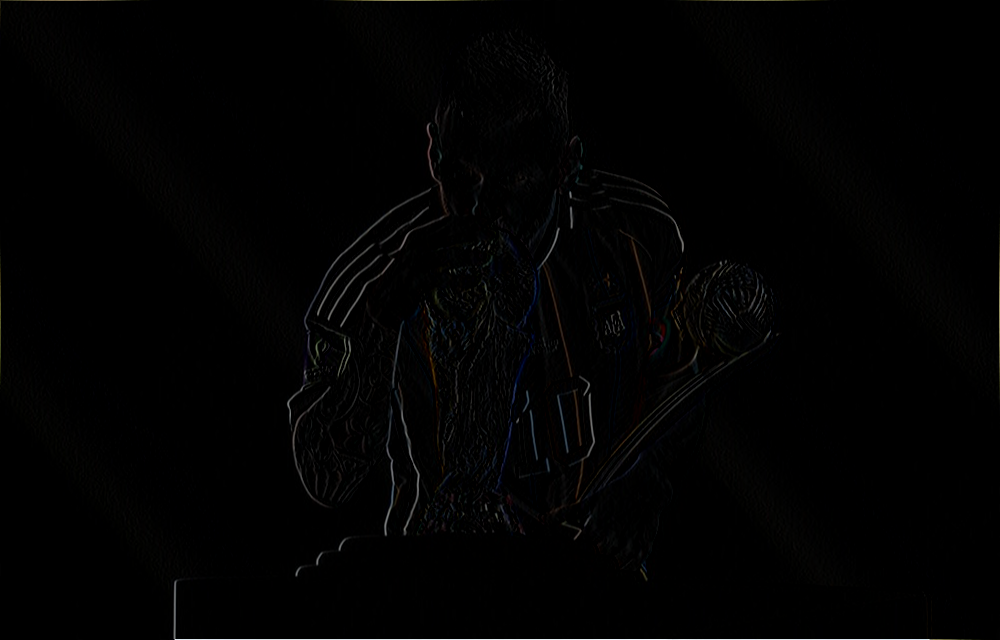

In [7]:
kernel = ImageFilter.Kernel((3, 3), kernel=kernel_spec, scale=1)
img.filter(kernel)

<Axes: >

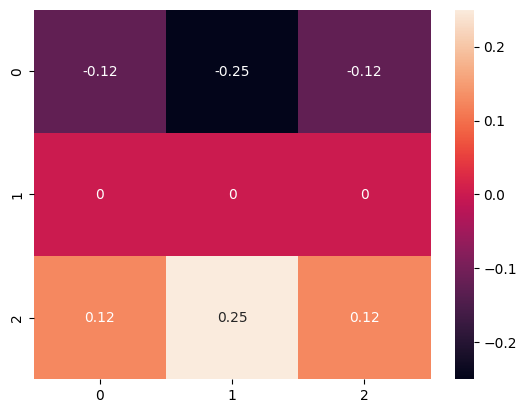

In [8]:
kernel_spec = [
    -0.125, -0.25, -0.125,
    0.0,  0.0, 0.0,
    0.125, 0.25, 0.125
]


sns.heatmap(np.array(kernel_spec).reshape(3, 3), annot=True)

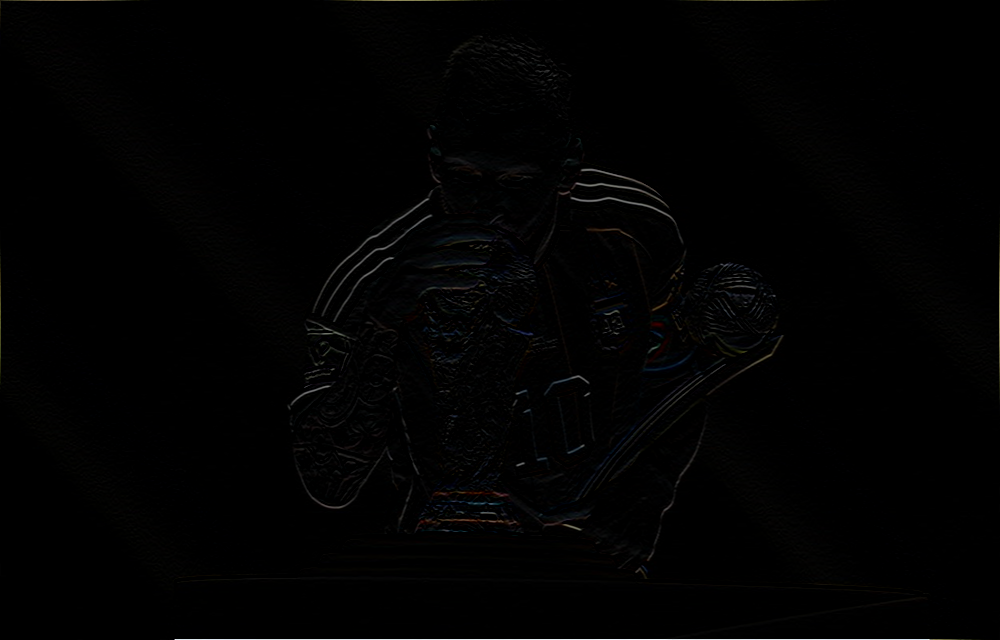

In [9]:
kernel = ImageFilter.Kernel((3, 3), kernel=kernel_spec, scale=1)
img.filter(kernel)

Lo realmente interesante es que dependiendo de los valores de los pesos dentro del filtro, obtenemos una activación distinta. Como los pesos de los filtros se aprenden durante en entrenamiento, esto significa que la red va a poder aprender los distintos filtros que le resulten de utilidad para optimizar su objetivo, sin necesidad que nosotros los especifiquemos a mano.

La mayoría de los kernels aplicados al aprendizaje profundo y las CNN son matrices cuadradas N × N, lo que les permite aprovechar las bibliotecas de álgebra lineal optimizadas que funcionan de manera más eficiente en matrices cuadradas.

## Padding y stride

### Padding

El padding describe el agregado de píxeles alrededor de los bordes de una imagen. El propósito del relleno es conservar el tamaño original de una imagen al aplicar un filtro convolucional y permitir que el filtro realice convoluciones completas en los píxeles de los bordes, de otra forma, solamente se podría realizar la operación en las zonas donde el kernel entre completamente.

<!-- ![Un filtro convolucional de 3x3 con padding y stride de 1](images/padding_and_stride.png) -->

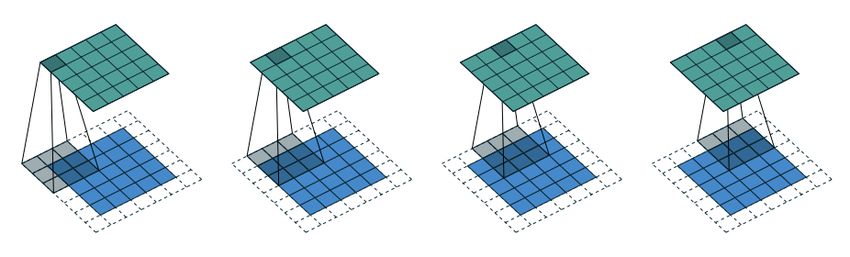

Hay muchas formas de hacer ese rellenado, lo más común es agregar pixeles con ceros.


Sin el padding, las dimensiones espaciales del volumen de entrada disminuirían demasiado rápido, y no podríamos entrenar redes profundas (ya que los volúmenes de entrada serían demasiado pequeños para aprender cualquier patrón útil)


### Stride

Anteriormente describimos una operación de convolución como "deslizar" una matriz pequeña a través de una matriz grande, deteniéndose en cada coordenada, calculando un elemento multiplicación y suma, luego almacenando la salida. Podemos controlar la forma que se realiza ese deslizamiento a través del stride o saltos que damos entre cada convolución. Generalmente se utilizan stride de 1 o 2 pixeles.

Pasos de stride 1 harán que la imagen de salida tenga aproximadamente la misma altura y anchura que la imagen de entrada, mientras que pasos de stride 2 harán que la imagen de salida sea aproximadamente la mitad del tamaño de la imagen de entrada. Decimos "aproximadamente" porque depende del padding lo que ocurra con el borde de la imagen.

En general, strides más chicos resultan en la superposición espacial de los pixeles de entrada y en volúmenes de salida más grandes, mientras que strides más grandes resultan en filtros espacialmente más separados y volúmenes de salida más chicos. 

Además de usar un stride más grande en las capas convolucionales, existe otra forma de disminuir la dimensionalidad espacial de la red: las capas del tipo pooling, que veremos más adelante.

## Volumen de salida de una capa convolucional

<!-- ![Voumenes de entrada y salida de una capa convolucional](images/cnn_volume.png) -->

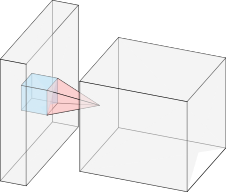

El volúmen de salida de una capa convolucional depende de los siquientes párámetros:

- El ancho de los datos entrantes ($W_\text{in}$)
- El alto de los datos entrantes ($H_\text{in}$)
- El número de filtros de la capa convolucional ($K$)
- El tamaño de los filtros ($F$)
- El parámetro stride ($S$)
- El parámetro de padding ($P$)

El resultado de esos parámetros es un volúmen $W_\text{out} \times H_\text{out} \times D_\text{out}$, donde:

- $W_\text{out} = (W_\text{in} - F + 2P)/S + 1$
- $H_\text{out} = (H_\text{in} - F + 2P)/S + 1$
- $D_\text{out} = K$

Noten que la profundidad de salida ($D_\text{out}$), depende exclusivamente de la cantidad de filtros en la capa. Y que la profundidad de los datos de entrada no influye en el tamaño de la salida.

## Nuestra primera red convolucional

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers

2023-07-02 14:25:48.094241: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
tf.config.list_physical_devices()

2023-07-02 14:25:49.157838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 14:25:49.160884: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 14:25:49.161003: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
# cargamos el dataset
(train_data, validation_data), info = tfds.load('cats_vs_dogs', split=["train[:75%]", "train[75%:]"], with_info=True, as_supervised=True)


# definimos las transformaciones que vamos a aplicar a las imagenes

def normalize(image, label):
    """ Normalize image: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label
              

def resize(image, label):
    """ Resize the image"""
    image = tf.image.resize(image, [32, 32], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return image, label

def pipeline(dataset):
    dataset = dataset.map(normalize)
    dataset = dataset.map(resize)
    dataset = dataset.cache()
    dataset = dataset.shuffle(info.splits['train[:75%]'].num_examples)
    return dataset

# le aplicamos la misma pipeline a nuestro dataset de entrenamiento y de validación

train_data = pipeline(train_data)
validation_data = pipeline(validation_data)

# Hacemos batchs de imágenes
batch_size = 32
batched_train_data = train_data.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
batched_validation_data = validation_data.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

2023-07-02 14:25:49.180294: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 14:25:49.180472: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 14:25:49.180580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Podemos ver algunos ejemplos concretos de imágenes para ver que el pipeline esta siendo aplicado correctamente

2023-07-02 14:25:49.798272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6]
	 [[{{node Placeholder/_0}}]]
2023-07-02 14:25:49.798592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6]
	 [[{{node Placeholder/_0}}]]
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 e

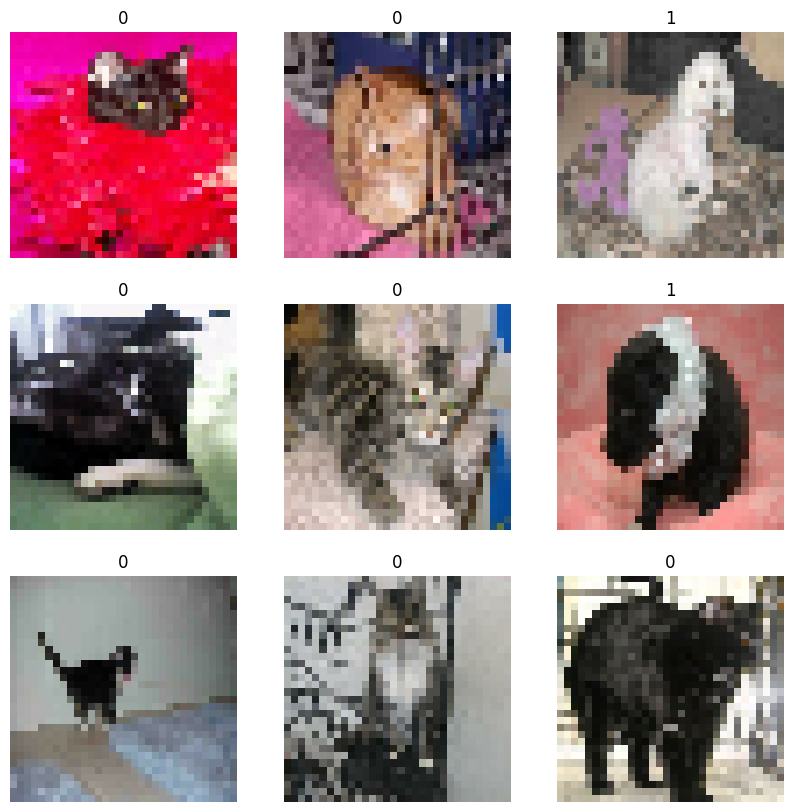

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in batched_train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(int(labels[i]))
        plt.axis("off")

Otra cosa que podemos intentar es aplicar algunas transformaciones extra al azar de modo de aumentar la cantidad de variaciones de los datos de entrenamiento que la red va a encontrar. 

No hay única forma de hacer esto, y más adelante lo discutiremos con más detalle, pero por ahora podemos aprovechar la misma maquinaria del `keras.Sequential` para crear una capa de data augmentation.

In [14]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
    ]
)

A continuación evaluamos el resultado de aplicar la capa de data augmentation a una imagen

2023-07-02 14:25:53.834924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [6]
	 [[{{node Placeholder/_2}}]]
2023-07-02 14:25:53.835219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6]
	 [[{{node Placeholder/_0}}]]


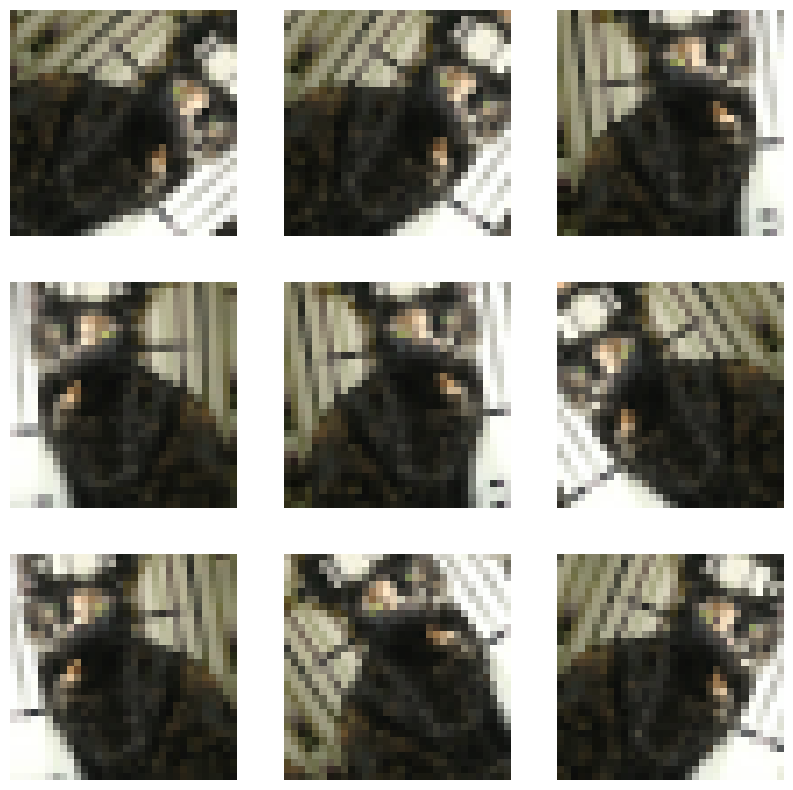

In [15]:
plt.figure(figsize=(10, 10))
for images, _ in batched_train_data.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[9].numpy())
        plt.axis("off")

### La capa `Conv2D`

Vamos a estar utilizando la capa `layers.Conv2D`, esto nos permite configurar la convolución. Entre los argumentos de esta capa se encuentran:

`padding`: uno de `"valid"` o `"same"` (no distingue entre mayúsculas y minúsculas). `"valid"` significa sin relleno. `"same"` da como resultado un relleno con ceros uniformemente a la izquierda/derecha o arriba/abajo de la entrada. Cuando `padding="same"` y `stride=1`, la salida tiene el mismo tamaño que la entrada.

`strides`: Un número entero o tupla/lista de 2 enteros, especificando las zancadas de la convolución a lo largo de la altura y el ancho. Puede ser un entero único para especificar el mismo valor para todas las dimensiones espaciales.

`activation`: Función de activación a utilizar. Si no especifica nada, no se aplica ninguna activación.

In [16]:
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),   # Esta capa simplemente especifica el tamaño de la entrada
        data_augmentation,
        layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
        layers.Flatten(),
        layers.Dense(1)
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 32769     
                                                                 
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    # List of metrics to monitor
    metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)],
)

In [18]:
history = model.fit(
    x=batched_train_data,
    epochs=100,
    validation_data=batched_validation_data,
)

Epoch 1/100


2023-07-02 14:25:54.557755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [6]
	 [[{{node Placeholder/_4}}]]
2023-07-02 14:25:54.558023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [6]
	 [[{{node Placeholder/_4}}]]
2023-07-02 14:25:55.542090: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-02 14:25:56.458439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-02 14:25:56

542/546 [============================>.] - ETA: 0s - loss: 0.6868 - binary_accuracy: 0.5241

2023-07-02 14:25:57.982599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [2]
	 [[{{node Placeholder/_2}}]]
2023-07-02 14:25:57.982944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [2]
	 [[{{node Placeholder/_1}}]]
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


546/546 [==============================] - 5s 5ms/step - loss: 0.6868 - binary_accuracy: 0.5241 - val_loss: 0.6705 - val_binary_accuracy: 0.5304
Epoch 2/100
546/546 [==============================] - 1s 2ms/step - loss: 0.6711 - binary_accuracy: 0.5387 - val_loss: 0.6671 - val_binary_accuracy: 0.5717
Epoch 3/100
546/546 [==============================] - 1s 2ms/step - loss: 0.6597 - binary_accuracy: 0.5571 - val_loss: 0.6551 - val_binary_accuracy: 0.5815
Epoch 4/100
546/546 [==============================] - 1s 2ms/step - loss: 0.6497 - binary_accuracy: 0.5684 - val_loss: 0.6421 - val_binary_accuracy: 0.5550
Epoch 5/100
546/546 [==============================] - 1s 2ms/step - loss: 0.6424 - binary_accuracy: 0.5816 - val_loss: 0.6499 - val_binary_accuracy: 0.6501
Epoch 6/100
546/546 [==============================] - 1s 2ms/step - loss: 0.6329 - binary_accuracy: 0.5938 - val_loss: 0.6310 - val_binary_accuracy: 0.6785
Epoch 7/100
546/546 [==============================] - 1s 2ms/step - l

<Axes: >

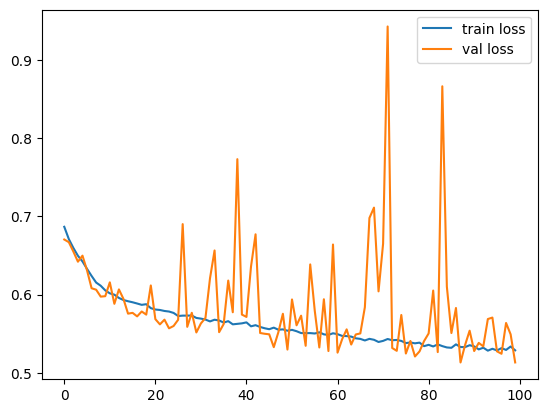

In [19]:
sns.lineplot(x=history.epoch, y=history.history['loss'], label="train loss")
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label="val loss")

<Axes: >

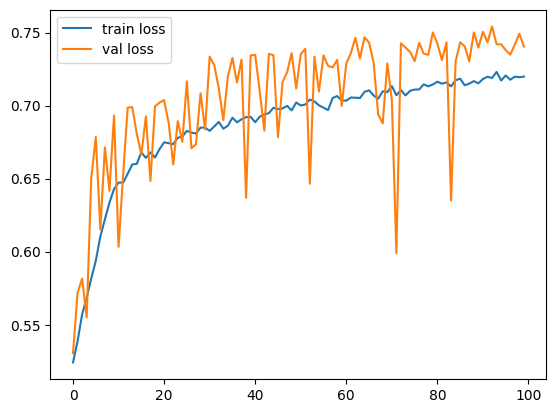

In [20]:
sns.lineplot(x=history.epoch, y=history.history['binary_accuracy'], label="train loss")
sns.lineplot(x=history.epoch, y=history.history['val_binary_accuracy'], label="val loss")

## Capas del tipo pooling (agrupación)

Agregar más capas convolucionales aumenta la profundidad de la red y con ello su capacidad, sin embargo esto lleva también a aumentar el número de parámetros que la red necesita optimizar (aprender). Este aumento en la dimensión de la red aumenta la complejidad temporal y espacial de las operaciones matemáticas que tienen lugar en el proceso de aprendizaje. Aquí es cuando las capas de pooling son útiles. La agrupación ayuda a reducir el tamaño de la red al reducir el número de parámetros pasados ​​a la siguiente capa. Además, ayuda a la propiedad de composicionalidad de la red neuronal, ya que las capas más profundas quedan espacialmente conectadas a una mayor parte de la imagen de entrada que las capas menos profundas. 

La capa de pooling aplican una función de reducción estadística a su entrada, como un máximo o un promedio, para reducir el número de parámetros pasados a​​​ la siguiente capa.

De manera similar a los filtros convolucionales, los filtros de max-pooling son ventanas de un cierto tamaño y valor de stride que se deslizan sobre la imagen. La diferencia es que, en este caso, las ventanas no tienen pesos ni valores asociados. Todo lo que hacen es deslizarse sobre los mapas de activación creados por la capa convolucional anterior y seleccionar el valor de píxel máximo para pasar a la siguiente capa, ignorando los valores restantes.

<!-- ![Ejemplo de max-pooling](images/max_pooling.png) -->

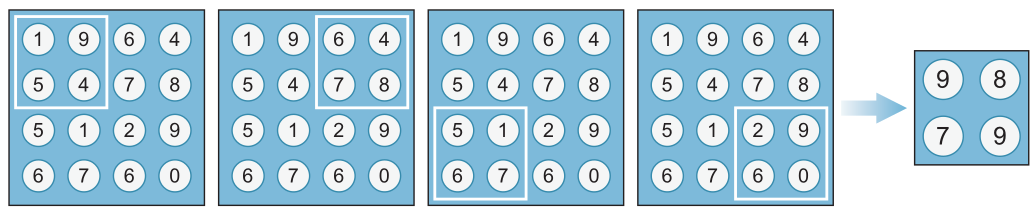

Lo que se logra con max-pooling es conservar las características de los mapas de activación más importantes, al mismo tiempo que reducimos la dimensionalidad espacial y consecuentemente el número de parámetros de la red. 

Algunos autores recomiendan no utilizar capas pooling, Por ejemplo, ["Striving for Simplicity: The All Convolutional Net"](https://arxiv.org/abs/1412.6806) propone descartar
pooling a favor de arquitecturas que solo utilicen convoluciones con strides más grandes para reducir el tamaño de la representación. También se ha encontrado que el descarte de pooling resulta útil en el entrenamiento de buenos modelos generativos, como redes adversarias generativas (GAN)

## Clasificador multi-categoría

### Cross-entropy loss

Supongamos que estamos tratando de clasificar una imagen en tres posibles clases (perro, gato, panda). La verdadera distribución para un ejemplo particular de entrenamiento podría ser la siguiente:

- Probabilidad (perro): 0
- Probabilidad (gato): 1
- Probabilidad (panda): 0

Podemos interpretar esta distribución "verdadera" en el sentido de que el ejemplo de entrenamiento tiene 0% probabilidad de ser de clase A, 100% de probabilidad de ser de clase B y 0% de probabilidad de ser clase c. 

Ahora, supongamos que nuestro algoritmo de aprendizaje automático predice lo siguiente distribución de probabilidad:

- Probabilidad (perro): 0.2
- Probabilidad (gato): 0.3
- Probabilidad (panda): 0.5

¿Qué tan cerca está la distribución predicha de la distribución real? Una medida posible de eso nos la da la fórmula para la cross-entropy loss:

$$ L^i = -\sum_j^k y_{j\text{true}}^i \log(y_{j\text{pred}}^i) $$

donde $i$ refiere al ejemplo en particular y $j$ refiere a una de las $k$ clases posibles. La suma es entonces sobre las tres clases (perro, gato, panda), en este caso el resultado es 1.2

$$ L^i = - [0.0 \log(0.2) + 1.0 \log(0.3) + 0.0 \log(0.5)] = 1.2 $$

Una mejor predicción nos da un mejor resultado: 

$$ L^i = - [0.0 \log(0.3) + 1.0 \log(0.5) + 0.0 \log(0.2)] = 0.69 $$

### Función softmax

Notemos que la formulación anterior asume que las predicciones forman una distribución de probabilidades, un requerimiento para ello es que sumen 1. Para lograr eso necesitamos aplicar alguna transformación al resultado de nuestros algoritmos de machine learning para que cumplan esa restricción.

La función softmax es una generalización de la función sigmoide. Se utiliza para obtener probabilidades de clasificación cuando tenemos más de dos clases. Lo que hace es forzar la salida de una red neuronal a que sume 1. La fórmula de softmax está dada por:

$$ \sigma(z_j) = \frac{e^{z_j}}{\sum_j^k e^{z_j}}  $$

donde nuevamente $j$ refiere a cada una de las $k$ clases posibles

### Codificación one-hot

Generalmente las etiquetas de un dataset vienen codificadas en texto ("perro", "gato", "panda") o en enteros (0, 1, 2). Si nuestro objetivo es las clasificación multi-clase, nos conviene transformarlas en un formato más útil. 

La codificación one-hot es un proceso mediante el cual las variables se convierten en una forma numérica de manera tal que a cada etiqueta en particular le corresponde un vector formado por ceros, excepto en una sóla componente que recibe un 1. Por ejemplo, ("perro", "gato", "panda") se convierten en: 

 - "perro" $\rightarrow [1, 0, 0]$
 - "gato" $\rightarrow [0, 1, 0]$
 - "panda" $\rightarrow [0, 0, 1]$

La combinación de estos tres factores: cross-entropy, softmax y codificación one-hot, nos va a permitir diseñar una red que aprenda a clasificar un número arbitrario de clases



### Clasificando MNIST

In [21]:
(mnist_train_data, mnist_validation_data), mnist_info = tfds.load('mnist', split=["train", "test"], with_info=True, as_supervised=True)

2023-07-02 14:27:49.631972: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /home/user/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [22]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/home/user/tensorflow_datasets/mnist/3.0.1.incompleteU24A1V',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
   

2023-07-02 14:27:56.171530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-07-02 14:27:56.171816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-07-02 14:27:56.191101: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline 

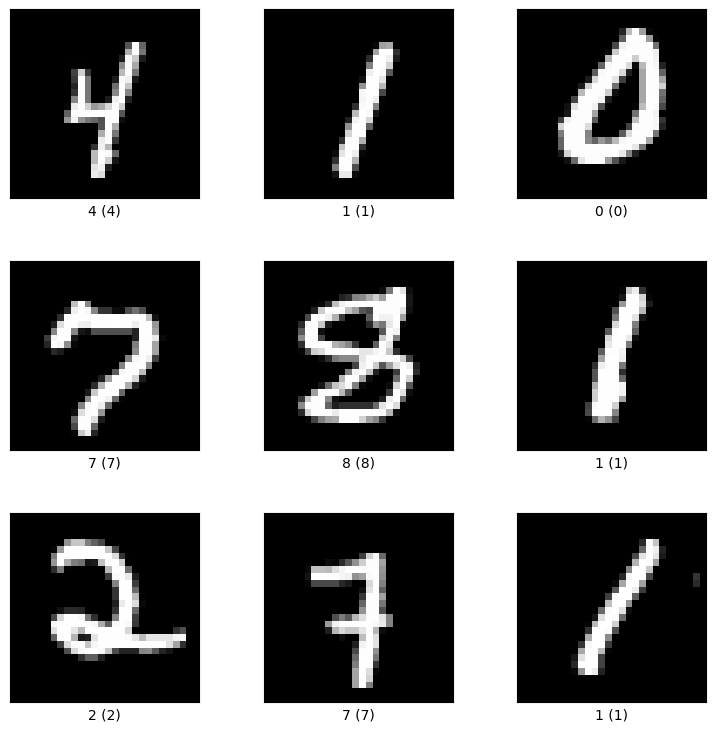

In [23]:
tfds.visualization.show_examples(mnist_train_data, mnist_info);


El siguiente código transforma las etiquetas al formato one-hot

In [24]:
num_classes = 10

def to_categorical(image, label):
    return image, tf.one_hot(tf.cast(label, tf.int32), num_classes)


def mnist_pipeline(dataset):
    dataset = dataset.map(normalize)
    dataset = dataset.map(to_categorical)
    dataset = dataset.cache()
    dataset = dataset.shuffle(mnist_info.splits['train'].num_examples)
    return dataset


mnist_train_data = mnist_pipeline(mnist_train_data)
mnist_validation_data = mnist_pipeline(mnist_validation_data)

In [25]:
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Para realizar la clasificación multi-categoría vamos a reemplazar la función de perdida `BinaryCrossentropy` de los ejemplos anteriores por `CategoricalCrossentropy`. 
Además vamos areemplazar la métrica `BinaryAcurracy` por `CategoricalAccuracy`

In [26]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    # List of metrics to monitor
    metrics=[keras.metrics.CategoricalAccuracy()],
)

Tengan en cuenta que en keras hay otra forma de solicitar una métrica que consiste en simplemente pasar un string, por ejemplo pasar `metrics=["accuracy"]` tendría el mismo resultado que el código anterior. 

Sin embargo, hay cierta ambigüedad acerca de a que métrica, "accuracy" se refiere, resulta que keras selecciona el tipo de métrica dependiendo de la función de pérdida que solicitemos. Es decir, selecciona entre `tf.keras.metrics.BinaryAccuracy` y `tf.keras.metrics.CategoricalAccuracy`

In [27]:
batch_size = 128

batched_mnist_train_data = mnist_train_data.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
batched_mnist_validation_data = mnist_validation_data.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
batched_mnist_validation_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [29]:
history = model.fit(
    x=batched_mnist_train_data,
    epochs=15,
    validation_data=batched_mnist_validation_data,
)

Epoch 1/15


2023-07-02 14:27:56.830681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-07-02 14:27:56.831095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]


469/469 [==============================] - ETA: 0s - loss: 1.3284 - categorical_accuracy: 0.6879

2023-07-02 14:27:58.808481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-07-02 14:27:58.808927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]


469/469 [==============================] - 2s 2ms/step - loss: 1.3284 - categorical_accuracy: 0.6879 - val_loss: 0.4035 - val_categorical_accuracy: 0.8929
Epoch 2/15
469/469 [==============================] - 1s 2ms/step - loss: 0.3401 - categorical_accuracy: 0.9028 - val_loss: 0.2714 - val_categorical_accuracy: 0.9245
Epoch 3/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2544 - categorical_accuracy: 0.9266 - val_loss: 0.2108 - val_categorical_accuracy: 0.9398
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2086 - categorical_accuracy: 0.9396 - val_loss: 0.1852 - val_categorical_accuracy: 0.9484
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.1782 - categorical_accuracy: 0.9483 - val_loss: 0.1509 - val_categorical_accuracy: 0.9549
Epoch 6/15
469/469 [==============================] - 1s 2ms/step - loss: 0.1568 - categorical_accuracy: 0.9554 - val_loss: 0.1350 - val_categorical_accuracy: 0.9606
Epoch 7/15
469/

<Axes: >

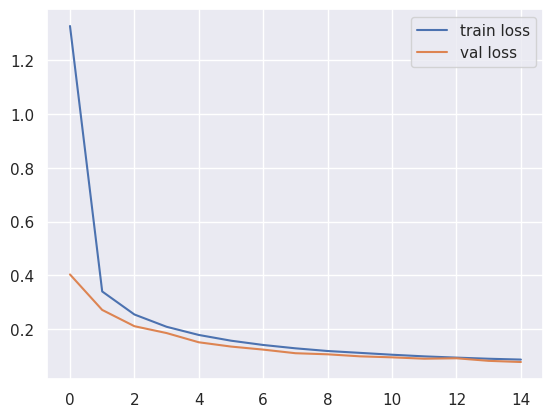

In [30]:
import seaborn as sns
sns.set_theme()

sns.lineplot(x=history.epoch, y=history.history['loss'], label="train loss")
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label="val loss")



<Axes: >

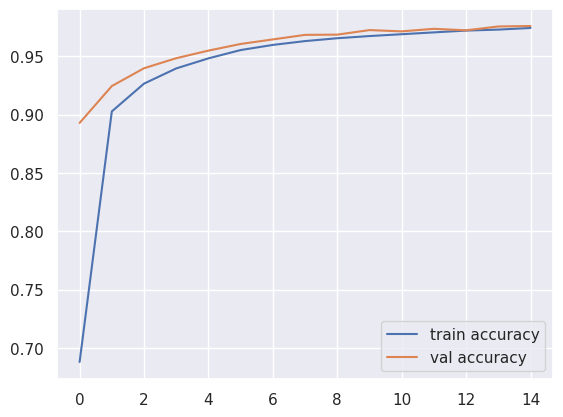

In [31]:
sns.lineplot(x=history.epoch, y=history.history['categorical_accuracy'], label="train accuracy")
sns.lineplot(x=history.epoch, y=history.history['val_categorical_accuracy'], label="val accuracy")

## Volviendo a intentar con Cats vs Dogs en una red más profunda

Ahora que tenemos una red más profunda que parece funcionar bien en MNIST, volvamos a probar con nuestros perros y gatos

In [32]:
input_shape = (32, 32, 3)
num_classes = 2

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                

In [33]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    # List of metrics to monitor
    metrics=[keras.metrics.CategoricalAccuracy()],
)

In [34]:
(train_data, validation_data), info = tfds.load('cats_vs_dogs', split=["train[:75%]", "train[75%:]"], with_info=True, as_supervised=True)

train_data = pipeline(train_data)
validation_data = pipeline(validation_data)


# Le aplicamos la transformación to_categorical, porque en la pipeline no estaba incluido
train_data = train_data.map(to_categorical)
validation_data = validation_data.map(to_categorical)


batch_size = 32
batched_train_data = train_data.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
batched_validation_data = validation_data.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
history = model.fit(
    x=batched_train_data,
    epochs=100,
    validation_data=batched_validation_data,
)

Epoch 1/100


2023-07-02 14:28:12.054232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [6]
	 [[{{node Placeholder/_4}}]]
2023-07-02 14:28:12.054545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [6]
	 [[{{node Placeholder/_4}}]]
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 ext

546/546 [==============================] - ETA: 0s - loss: 0.6882 - categorical_accuracy: 0.5370

2023-07-02 14:28:17.125251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [2]
	 [[{{node Placeholder/_3}}]]
2023-07-02 14:28:17.125528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [2]
	 [[{{node Placeholder/_1}}]]
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


546/546 [==============================] - 7s 5ms/step - loss: 0.6882 - categorical_accuracy: 0.5370 - val_loss: 0.6770 - val_categorical_accuracy: 0.6059
Epoch 2/100
546/546 [==============================] - 1s 2ms/step - loss: 0.6716 - categorical_accuracy: 0.5866 - val_loss: 0.6697 - val_categorical_accuracy: 0.5741
Epoch 3/100
546/546 [==============================] - 1s 2ms/step - loss: 0.6563 - categorical_accuracy: 0.6141 - val_loss: 0.6827 - val_categorical_accuracy: 0.5514
Epoch 4/100
546/546 [==============================] - 1s 2ms/step - loss: 0.6480 - categorical_accuracy: 0.6220 - val_loss: 0.7591 - val_categorical_accuracy: 0.5165
Epoch 5/100
546/546 [==============================] - 1s 2ms/step - loss: 0.6336 - categorical_accuracy: 0.6372 - val_loss: 0.6266 - val_categorical_accuracy: 0.6568
Epoch 6/100
546/546 [==============================] - 1s 2ms/step - loss: 0.6197 - categorical_accuracy: 0.6575 - val_loss: 0.6555 - val_categorical_accuracy: 0.6042
Epoch 7/10

<Axes: >

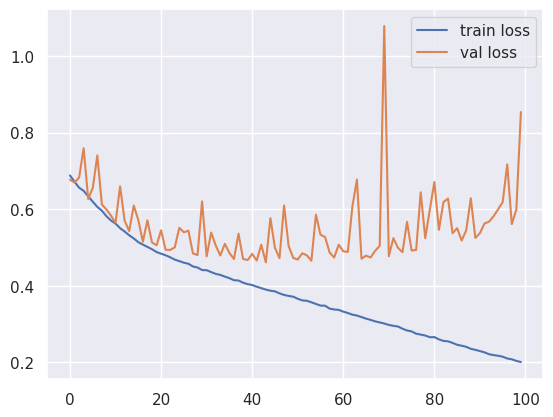

In [36]:
sns.lineplot(x=history.epoch, y=history.history['loss'], label="train loss")
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label="val loss")

<Axes: >

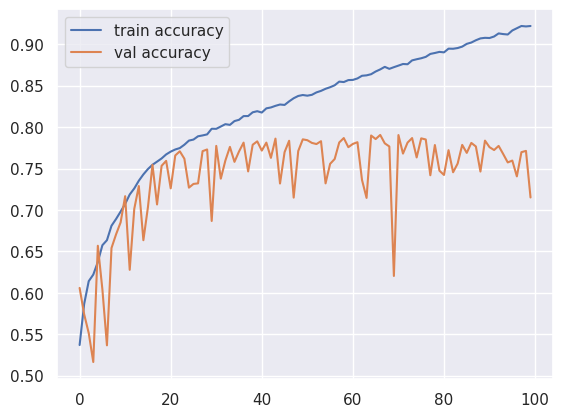

In [37]:
sns.lineplot(x=history.epoch, y=history.history['categorical_accuracy'], label="train accuracy")
sns.lineplot(x=history.epoch, y=history.history['val_categorical_accuracy'], label="val accuracy")

Podemos concluir que el modelo ajusta mejor el set de entrenamiento, pero comienza a overfittear. Además el resultado sobre el set de validación es muy ruidoso, de una época a la siguiente hay mucha variación en loss y accuracy. Hacer redes más profundas es una buena dirección, pero no alcanza. ¡Necesitamos otras herramientas para seguir mejorando!